In [53]:
import pandas as pd
import numpy as np

import missingno as msno 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date, time, timedelta

from matplotlib.ticker import PercentFormatter
# plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
# plt.rcParams["figure.facecolor"]= "w"
# pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x) # change decimal places


In [54]:
#df = pd.read_csv("data_strube/wetterdaten_all-stations_hourly.csv", delimiter=";", decimal=",")

In [55]:
df =pd.read_pickle('data_strube/pickles/df_weatherstations.pkl')

In [56]:
df.shape

(36407, 60)

In [57]:
df.head(2)

station_location country           date_time  day  month  year   hour  \
0           Anklam       D 2021-04-14 17:00:00   14      4  2021  17:00   
1           Anklam       D 2021-04-14 18:00:00   14      4  2021  18:00   

   air_temperature_avg  air_temperature_max  air_temperature_min  ...  \
0                 8.12                 8.49                 7.55  ...   
1                 7.76                 8.17                 7.32  ...   

   soil_temperature_5_min  soil_temperature_6_vg  soil_temperature_6_max  \
0                     NaN                    NaN                     NaN   
1                     NaN                    NaN                     NaN   

   soil_temperature_6_min  solar_panel  battery  deltat_avg  deltat_max  \
0                     NaN      7069.00  6747.00        5.00        5.00   
1                     NaN      6906.00  6639.00        5.00        5.00   

   deltat_min  et0  
0        5.00  NaN  
1        4.00  NaN  

[2 rows x 60 columns]

In [58]:
df.station_location.unique()

array(['Anklam', 'Emmeloord', 'Herchsheim', 'Lamotte', 'Lelystad',
       'Mattenkofen', 'Soest', 'Sommepy', 'Stadthagen'], dtype=object)

In [59]:
#change date to datetime format and extract month and day, directly changing the month and day columns
df['date_time'] = pd.to_datetime(df['date_time'], yearfirst=True, format="%Y-%m-%d %H:%M:%S")
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day

In [60]:
df['plotting_date'] = df['date_time'].dt.dayofyear

In [61]:
df.head(2)

station_location country           date_time  day  month  year   hour  \
0           Anklam       D 2021-04-14 17:00:00   14      4  2021  17:00   
1           Anklam       D 2021-04-14 18:00:00   14      4  2021  18:00   

   air_temperature_avg  air_temperature_max  air_temperature_min  ...  \
0                 8.12                 8.49                 7.55  ...   
1                 7.76                 8.17                 7.32  ...   

   soil_temperature_6_vg  soil_temperature_6_max  soil_temperature_6_min  \
0                    NaN                     NaN                     NaN   
1                    NaN                     NaN                     NaN   

   solar_panel  battery  deltat_avg  deltat_max  deltat_min  et0  \
0      7069.00  6747.00        5.00        5.00        5.00  NaN   
1      6906.00  6639.00        5.00        5.00        4.00  NaN   

   plotting_date  
0            104  
1            104  

[2 rows x 61 columns]

In [62]:
df.describe()

day    month     year  air_temperature_avg  air_temperature_max  \
count 36407.00 36407.00 36407.00             36406.00             36406.00   
mean     15.83     6.99  2021.00                15.18                15.79   
std       8.85     1.73     0.00                 5.64                 5.73   
min       1.00     3.00  2021.00                -3.77                -3.62   
25%       8.00     6.00  2021.00                11.53                12.06   
50%      16.00     7.00  2021.00                15.23                15.72   
75%      24.00     8.00  2021.00                18.85                19.59   
max      31.00    11.00  2021.00                34.88                35.33   

       air_temperature_min  dew_point_avg  dew_point_min  solar_radiation  \
count             36406.00       36406.00       36406.00         36406.00   
mean                 14.60          12.18          11.60           204.88   
std                   5.58           5.20           5.23           279.85   
min                  -4.24          -9.70         -10.60             0.00   
25%                  10.99           9.10           8.60             0.00   
50%                  14.75          13.30          12.80            50.00   
75%                  18.19          16.00          15.40           350.00   
max                  34.43          25.40          24.70          1406.00   

       saturation_vpd_avg  ...  soil_temperature_6_vg  soil_temperature_6_max  \
count            36406.00  ...               28283.00                28283.00   
mean                 0.33  ...                  14.40                   14.46   
std                  0.47  ...                   3.13                    3.13   
min                  0.00  ...                   6.00                    6.00   
25%                  0.00  ...                  11.90                   12.00   
50%                  0.12  ...                  15.40                   15.40   
75%                  0.48  ...                  16.60                   16.70   
max                  3.90  ...                  21.40                   21.50   

       soil_temperature_6_min  solar_panel  battery  deltat_avg  deltat_max  \
count                28283.00     36406.00 36406.00    36406.00    36406.00   
mean                    14.36      4849.45  6643.12        1.66        2.02   
std                      3.13      4439.48   135.63        2.20        2.44   
min                      5.70         0.00  6217.00       -1.00       -1.00   
25%                     11.90         0.00  6519.00        0.00        0.00   
50%                     15.30      6017.50  6596.00        1.00        1.00   
75%                     16.60      9816.00  6773.00        3.00        3.00   
max                     21.40     10511.00  6881.00       14.00       14.00   

       deltat_min     et0  plotting_date  
count    36406.00 1518.00       36407.00  
mean         1.34    2.94         196.93  
std          1.98    1.40          52.16  
min         -1.00    0.10          89.00  
25%          0.00    2.00         154.00  
50%          0.00    2.80         196.00  
75%          2.00    3.80         239.00  
max         13.00    8.30         316.00  

[8 rows x 57 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36407 entries, 0 to 53682
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   station_location        36407 non-null  object        
 1   country                 36407 non-null  object        
 2   date_time               36407 non-null  datetime64[ns]
 3   day                     36407 non-null  int64         
 4   month                   36407 non-null  int64         
 5   year                    36407 non-null  int64         
 6   hour                    36407 non-null  object        
 7   air_temperature_avg     36406 non-null  float64       
 8   air_temperature_max     36406 non-null  float64       
 9   air_temperature_min     36406 non-null  float64       
 10  dew_point_avg           36406 non-null  float64       
 11  dew_point_min           36406 non-null  float64       
 12  solar_radiation         36406 non-null  float6

In [64]:
df.isnull().sum()

station_location        0
country                 0
date_time               0
day                     0
month                   0
                    ...  
deltat_avg              1
deltat_max              1
deltat_min              1
et0                 34889
plotting_date           0
Length: 61, dtype: int64

In [65]:
df.duplicated().value_counts()

False    36407
dtype: int64

In [66]:
df.columns

Index(['station_location', 'country', 'date_time', 'day', 'month', 'year',
       'hour', 'air_temperature_avg', 'air_temperature_max',
       'air_temperature_min', 'dew_point_avg', 'dew_point_min',
       'solar_radiation', 'saturation_vpd_avg', 'saturation_vpd_min',
       'relative_humidity_avg', 'relative_humidity_max',
       'relative_humidity_min', 'precipitation', 'leaf_wetness',
       'wind_speed_avg', 'wind_speed_max', 'wind_speed_gusts',
       'wind_direction', 'eag_soil_moisture_1', 'eag_soil_moisture_2',
       'eag_soil_moisture_3', 'eag_soil_moisture_4', 'eag_soil_moisture_5',
       'eag_soil_moisture_6', 'soil_salinity_1', 'soil_salinity_2',
       'soil_salinity_3', 'soil_salinity_4', 'soil_salinity_5',
       'soil_salinity_6', 'soil_temperature_1_vg', 'soil_temperature_1_max',
       'soil_temperature_1_min', 'soil_temperature_2_vg',
       'soil_temperature_2_max', 'soil_temperature_2_min',
       'soil_temperature_3_vg', 'soil_temperature_3_max',
       'soil_t

<AxesSubplot:>

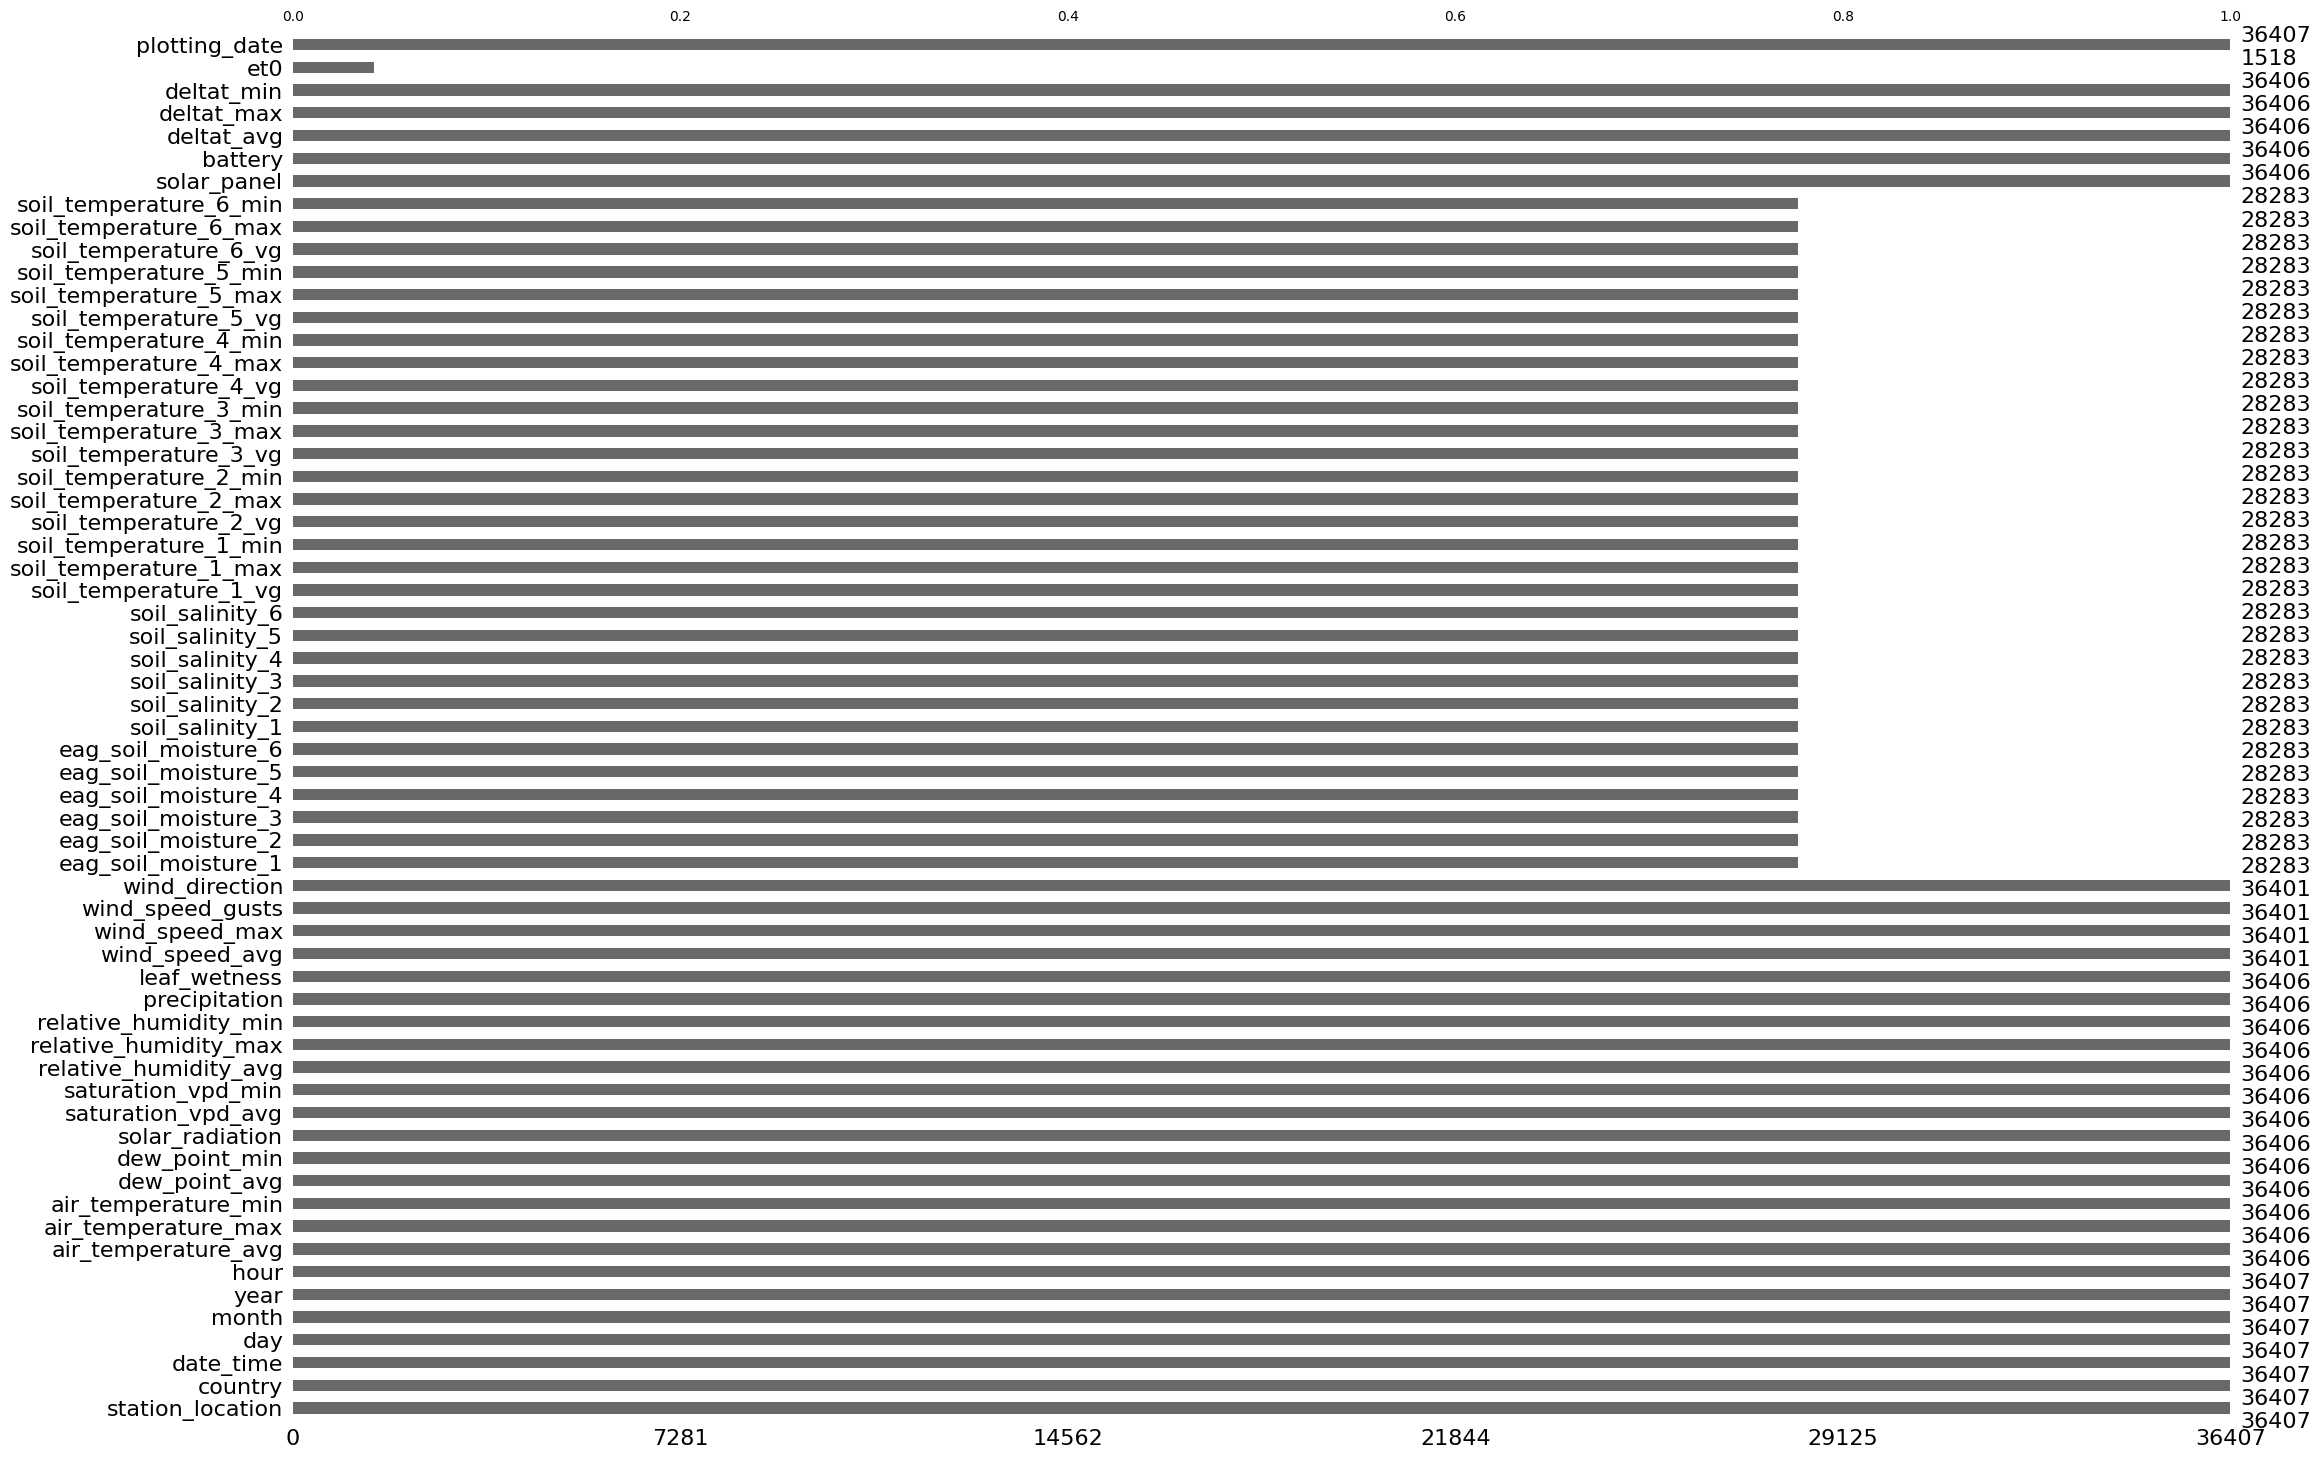

In [67]:
msno.bar(df)

<AxesSubplot:>

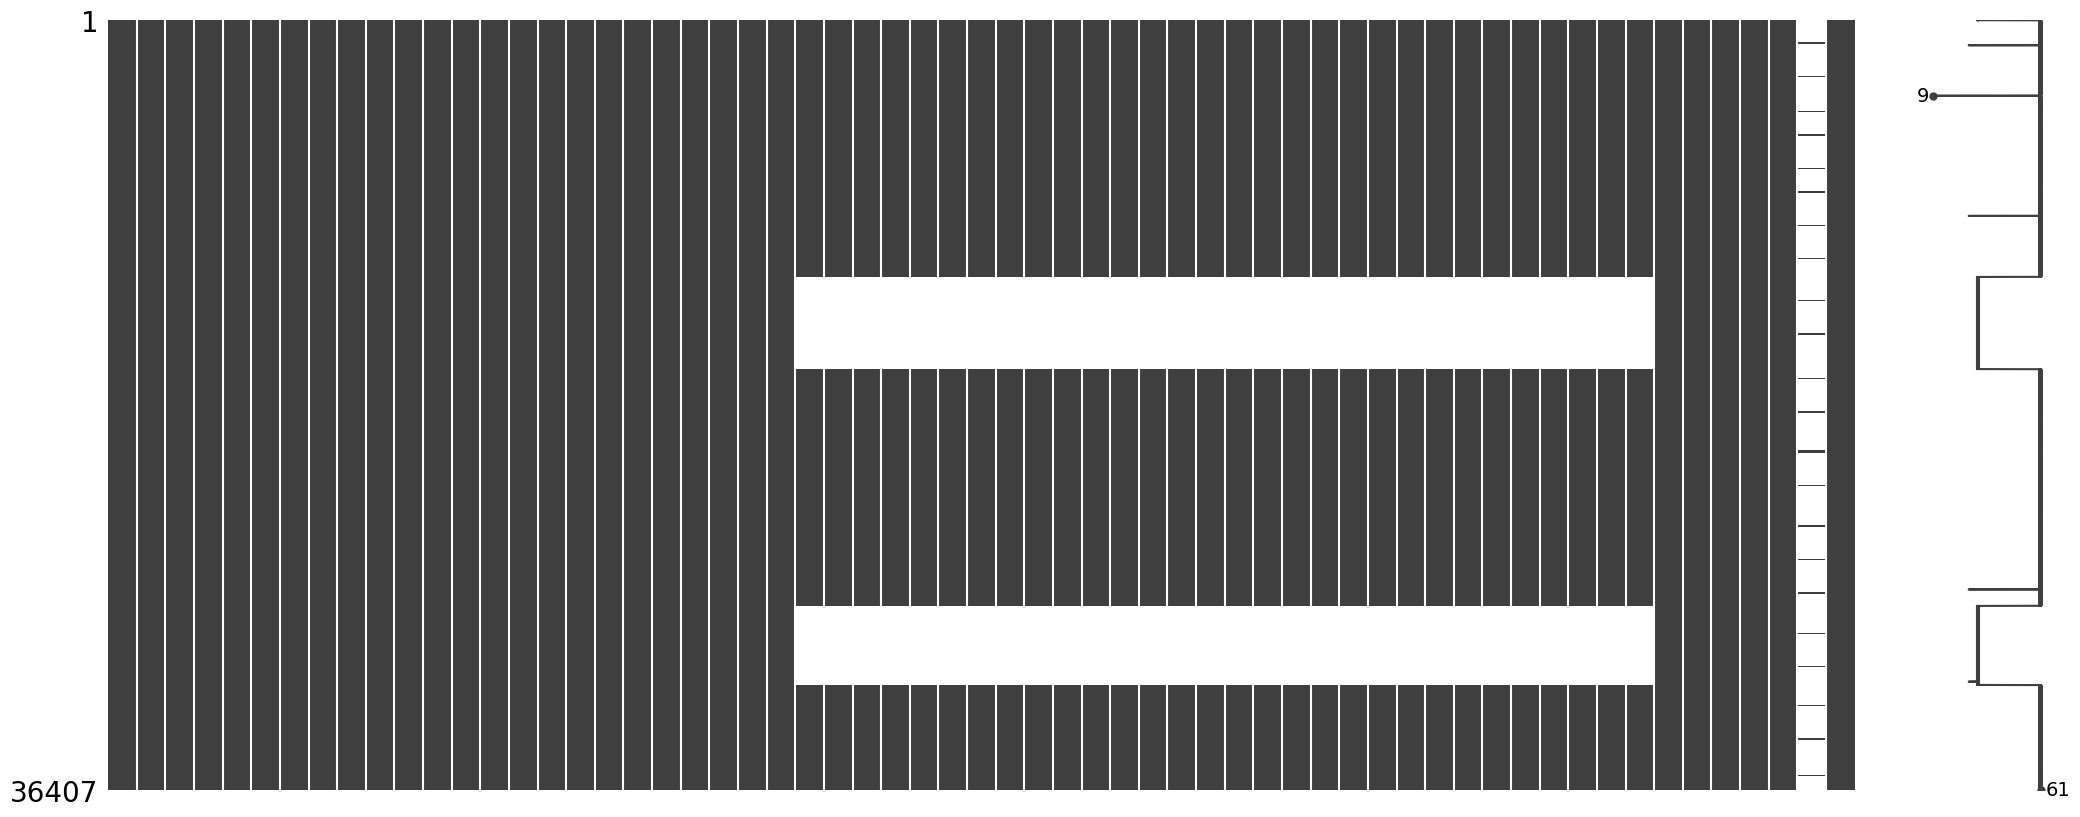

In [68]:
msno.matrix(df)

In [69]:

# correlation matrix between these variables
corr_mtrx=df.corr()
corr_mtrx

day  month  year  air_temperature_avg  \
day                     1.00  -0.16   NaN                -0.04   
month                  -0.16   1.00   NaN                 0.15   
year                     NaN    NaN   NaN                  NaN   
air_temperature_avg    -0.04   0.15   NaN                 1.00   
air_temperature_max    -0.04   0.15   NaN                 1.00   
air_temperature_min    -0.04   0.16   NaN                 1.00   
dew_point_avg          -0.04   0.40   NaN                 0.75   
dew_point_min          -0.04   0.41   NaN                 0.71   
solar_radiation        -0.01  -0.12   NaN                 0.53   
saturation_vpd_avg     -0.03  -0.18   NaN                 0.65   
saturation_vpd_min     -0.03  -0.18   NaN                 0.61   
relative_humidity_avg   0.00   0.34   NaN                -0.44   
relative_humidity_max   0.00   0.33   NaN                -0.41   
relative_humidity_min   0.01   0.34   NaN                -0.45   
precipitation           0.01  -0.01   NaN                -0.00   
leaf_wetness            0.04   0.01   NaN                -0.21   
wind_speed_avg          0.04  -0.24   NaN                -0.08   
wind_speed_max          0.03  -0.28   NaN                -0.06   
wind_speed_gusts        0.05  -0.27   NaN                 0.04   
wind_direction         -0.01  -0.03   NaN                -0.10   
eag_soil_moisture_1    -0.03  -0.32   NaN                -0.18   
eag_soil_moisture_2    -0.05  -0.55   NaN                -0.13   
eag_soil_moisture_3    -0.03  -0.63   NaN                -0.09   
eag_soil_moisture_4    -0.01  -0.62   NaN                 0.01   
eag_soil_moisture_5    -0.00  -0.65   NaN                 0.05   
eag_soil_moisture_6     0.00  -0.58   NaN                 0.03   
soil_salinity_1        -0.03  -0.18   NaN                 0.21   
soil_salinity_2        -0.08  -0.25   NaN                 0.09   
soil_salinity_3        -0.06  -0.34   NaN                 0.14   
soil_salinity_4        -0.03  -0.26   NaN                -0.01   
soil_salinity_5        -0.06  -0.26   NaN                 0.07   
soil_salinity_6        -0.03  -0.34   NaN                 0.13   
soil_temperature_1_vg  -0.04   0.02   NaN                 0.86   
soil_temperature_1_max -0.04  -0.00   NaN                 0.86   
soil_temperature_1_min -0.04   0.04   NaN                 0.86   
soil_temperature_2_vg  -0.03   0.10   NaN                 0.74   
soil_temperature_2_max -0.03   0.09   NaN                 0.74   
soil_temperature_2_min -0.03   0.10   NaN                 0.74   
soil_temperature_3_vg  -0.03   0.16   NaN                 0.67   
soil_temperature_3_max -0.03   0.16   NaN                 0.67   
soil_temperature_3_min -0.03   0.16   NaN                 0.67   
soil_temperature_4_vg  -0.02   0.20   NaN                 0.65   
soil_temperature_4_max -0.02   0.20   NaN                 0.65   
soil_temperature_4_min -0.02   0.21   NaN                 0.64   
soil_temperature_5_vg  -0.02   0.26   NaN                 0.64   
soil_temperature_5_max -0.02   0.26   NaN                 0.64   
soil_temperature_5_min -0.02   0.26   NaN                 0.64   
soil_temperature_6_vg  -0.01   0.32   NaN                 0.64   
soil_temperature_6_max -0.01   0.32   NaN                 0.64   
soil_temperature_6_min -0.01   0.32   NaN                 0.64   
solar_panel            -0.01  -0.10   NaN                 0.48   
battery                -0.00  -0.10   NaN                 0.48   
deltat_avg             -0.02  -0.26   NaN                 0.55   
deltat_max             -0.02  -0.26   NaN                 0.57   
deltat_min             -0.02  -0.25   NaN                 0.53   
et0                    -0.03  -0.38   NaN                 0.35   
plotting_date           0.01   0.99   NaN                 0.15   

                        air_temperature_max  air_temperature_min  \
day                                   -0.04                -0.04   
month                                  0.15                 

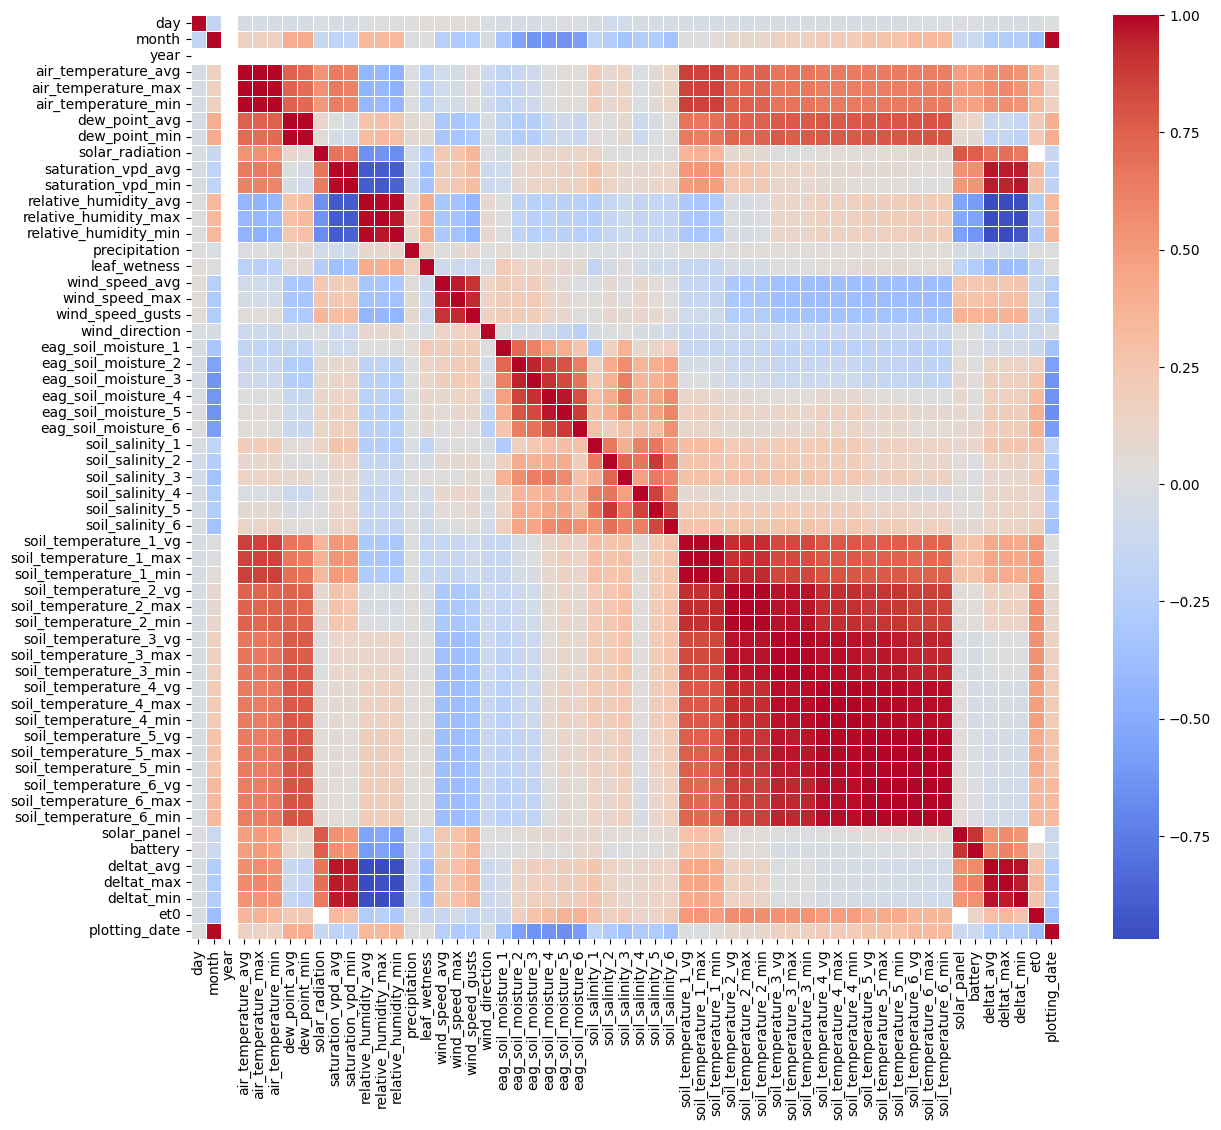

In [70]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=False, cmap='coolwarm')

#### Lufttemperatur

In [71]:
from matplotlib import pyplot as plt
# Set the figure size
plt.rcParams["figure.figsize"] = [15, 3.50]
plt.rcParams["figure.autolayout"] = True
# Pandas dataframe
data = df[['lufttemperatur [°c]avg', 'lufttemperatur [°c]max',
       'lufttemperatur [°c]min']]
# Plot the dataframe
ax = data.plot(kind='box', title='boxplot')
# Display the plot
plt.show()

KeyError: "None of [Index(['lufttemperatur [°c]avg', 'lufttemperatur [°c]max',\n       'lufttemperatur [°c]min'],\n      dtype='object')] are in the [columns]"

#### Bodenfeuchte

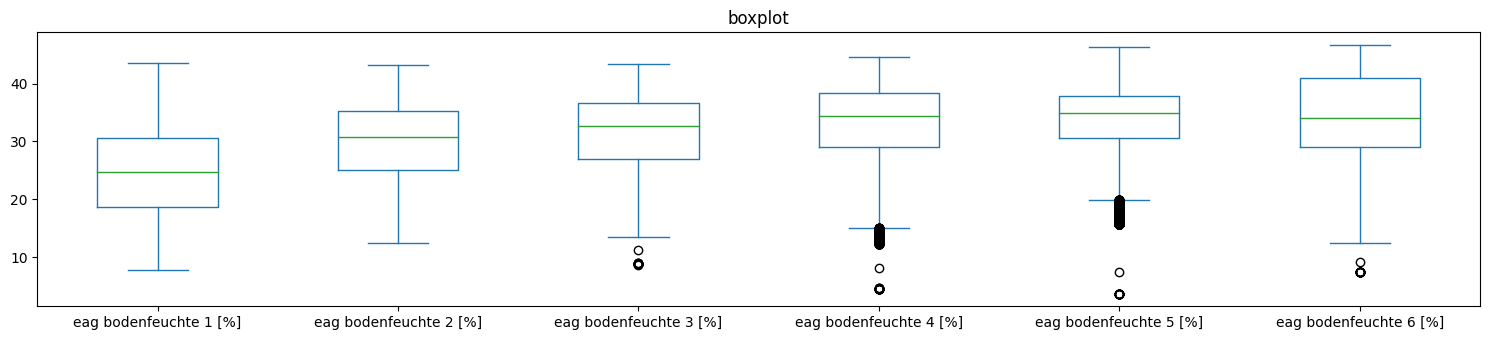

In [ ]:
from matplotlib import pyplot as plt
# Set the figure size
plt.rcParams["figure.figsize"] = [15, 3.50]
plt.rcParams["figure.autolayout"] = True
# Pandas dataframe
data = df[['eag bodenfeuchte 1 [%]',
       'eag bodenfeuchte 2 [%]', 'eag bodenfeuchte 3 [%]',
       'eag bodenfeuchte 4 [%]', 'eag bodenfeuchte 5 [%]',
       'eag bodenfeuchte 6 [%]']]
# Plot the dataframe
ax = data.plot(kind='box', title='boxplot')
# Display the plot
plt.show()

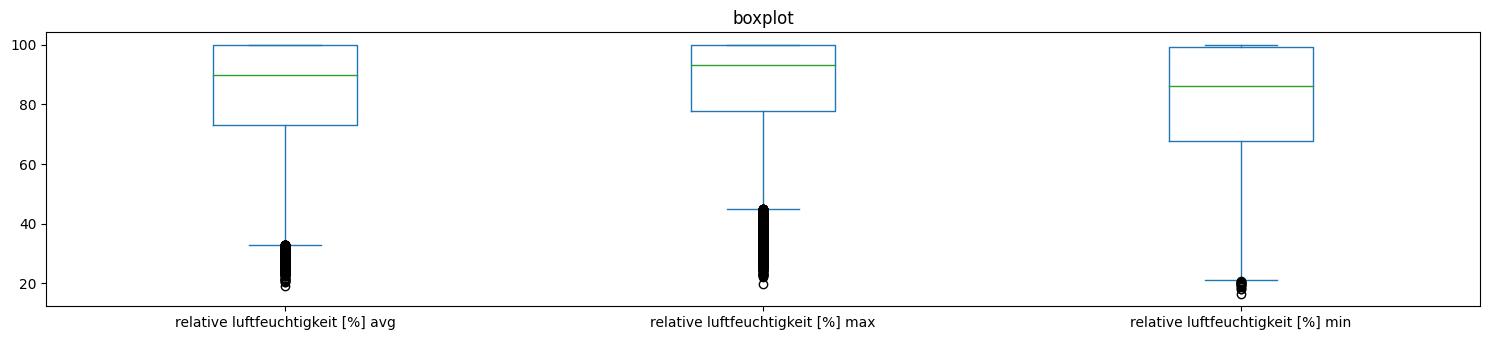

In [ ]:
from matplotlib import pyplot as plt
# Set the figure size
plt.rcParams["figure.figsize"] = [15, 3.50]
plt.rcParams["figure.autolayout"] = True
# Pandas dataframe
data = df[['relative luftfeuchtigkeit [%] avg',
       'relative luftfeuchtigkeit [%] max',
       'relative luftfeuchtigkeit [%] min']]
# Plot the dataframe
ax = data.plot(kind='box', title='boxplot')
# Display the plot
plt.show()

#### Bodensalzgehalt

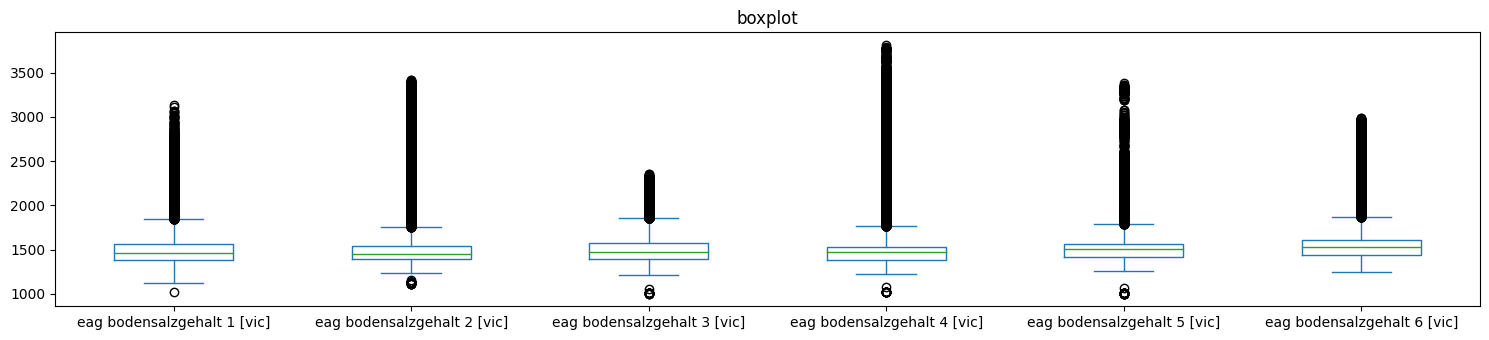

In [ ]:
from matplotlib import pyplot as plt
# Set the figure size
plt.rcParams["figure.figsize"] = [15, 3.50]
plt.rcParams["figure.autolayout"] = True
# Pandas dataframe
data = df[['eag bodensalzgehalt 1 [vic]',
       'eag bodensalzgehalt 2 [vic]', 'eag bodensalzgehalt 3 [vic]',
       'eag bodensalzgehalt 4 [vic]', 'eag bodensalzgehalt 5 [vic]',
       'eag bodensalzgehalt 6 [vic]']]
# Plot the dataframe
ax = data.plot(kind='box', title='boxplot')
# Display the plot
plt.show()

#### Bodentemperatur

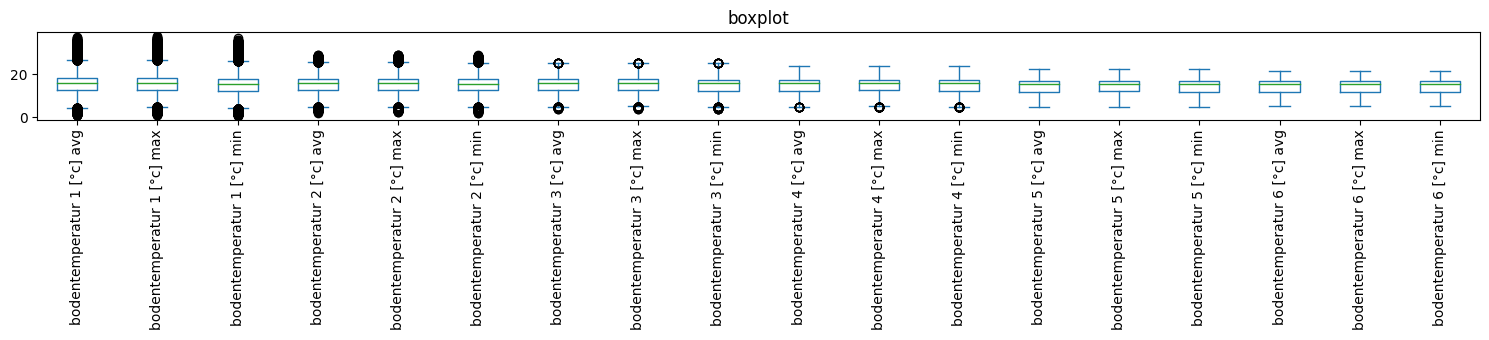

In [ ]:
from matplotlib import pyplot as plt
# Set the figure size
plt.rcParams["figure.figsize"] = [15, 3.50]
plt.rcParams["figure.autolayout"] = True
# Pandas dataframe
xticklabels = ['bodentemperatur 1 [°c] avg',
       'bodentemperatur 1 [°c] max', 'bodentemperatur 1 [°c] min',
       'bodentemperatur 2 [°c] avg', 'bodentemperatur 2 [°c] max',
       'bodentemperatur 2 [°c] min', 'bodentemperatur 3 [°c] avg',
       'bodentemperatur 3 [°c] max', 'bodentemperatur 3 [°c] min',
       'bodentemperatur 4 [°c] avg', 'bodentemperatur 4 [°c] max',
       'bodentemperatur 4 [°c] min', 'bodentemperatur 5 [°c] avg',
       'bodentemperatur 5 [°c] max', 'bodentemperatur 5 [°c] min',
       'bodentemperatur 6 [°c] avg', 'bodentemperatur 6 [°c] max',
       'bodentemperatur 6 [°c] min']
data = df[['bodentemperatur 1 [°c] avg',
       'bodentemperatur 1 [°c] max', 'bodentemperatur 1 [°c] min',
       'bodentemperatur 2 [°c] avg', 'bodentemperatur 2 [°c] max',
       'bodentemperatur 2 [°c] min', 'bodentemperatur 3 [°c] avg',
       'bodentemperatur 3 [°c] max', 'bodentemperatur 3 [°c] min',
       'bodentemperatur 4 [°c] avg', 'bodentemperatur 4 [°c] max',
       'bodentemperatur 4 [°c] min', 'bodentemperatur 5 [°c] avg',
       'bodentemperatur 5 [°c] max', 'bodentemperatur 5 [°c] min',
       'bodentemperatur 6 [°c] avg', 'bodentemperatur 6 [°c] max',
       'bodentemperatur 6 [°c] min']]
# Plot the dataframe
ax = data.plot(kind='box', title='boxplot')
ax.set_xticklabels(xticklabels, rotation = 90)
# Display the plot
plt.show()

### mean for each day

In [ ]:
df['country'].unique()

array(['D', 'NL', 'F'], dtype=object)

In [ ]:
df['standort'].unique()

array(['Anklam', 'Bautzen', 'Berklingen', 'Emmeloord', 'Groningen',
       'Herchsheim 1', 'Lamotte', 'Lelystad', 'Mattenkofen', 'Peine',
       'Soest', 'Söllingen', 'Sommepy', 'Stadthagen'], dtype=object)

In [ ]:
df['monat'].unique()

array([ 4,  5,  6,  7,  8,  9, 10,  3, 11])

In [ ]:
df['tag'].unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 31])

In [ ]:
df['plotting_date'].unique()

array([104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 28

In [72]:
df_grouped = df.groupby(['country', 'station_location', 'month', 'day']).mean()
#.agg({'lufttemperatur [°c]avg': 'mean', 'niederschlag [mm]': 'sum'})
df_grouped

year  air_temperature_avg  \
country station_location month day                                
D       Anklam           4     14  2021.00                 4.43   
                               15  2021.00                 4.81   
                               16  2021.00                 6.22   
                               17  2021.00                 7.47   
                               18  2021.00                 6.75   
...                                    ...                  ...   
NL      Lelystad         9     8   2021.00                18.93   
                               9   2021.00                18.68   
                               10  2021.00                19.32   
                               11  2021.00                18.16   
                               12  2021.00                16.21   

                                    air_temperature_max  air_temperature_min  \
country station_location month day                                             
D       Anklam           4     14                  5.17                 3.68   
                               15                  5.22                 4.43   
                               16                  6.64                 5.87   
                               17                  7.99                 6.95   
                               18                  7.09                 6.39   
...                                                 ...                  ...   
NL      Lelystad         9     8                  19.60                18.19   
                               9                  19.48                17.91   
                               10                 19.81                18.84   
                               11                 18.48                17.83   
                               12                 16.57                15.87   

                                    dew_point_avg  dew_point_min  \
country station_location month day                                 
D       Anklam           4     14           -1.79          -2.54   
                               15           -1.34          -1.92   
                               16            0.08          -0.46   
                               17            3.73           3.34   
                               18            5.76           5.51   
...                                           ...            ...   
NL      Lelystad         9     8            15.61          14.90   
                               9            16.90          16.18   
                               10           19.07          18.70   
                               11           18.09          17.78   
                               12           16.15          15.82   

                                    solar_radiation  saturation_vpd_avg  \
country station_location month day                                        
D       Anklam           4     14            107.86                0.31   
                               15            186.50                0.31   
                               16            234.54                0.33   
                               17            281.29                0.24   
                               18            139.33                0.06   
...                                             ...                 ...   
NL      Lelystad         9     8             208.50                0.50   
                               9             177.21                0.28   
                               10            103.91                0.03   
                               11             89.08                0.00   
                               12             63.31                0.00   

                                    saturation_vpd_min  relative_humidity_avg  \
country station_location month day                                              
D       Anklam           4     14                 0.26                  67.38   
                     

In [73]:
df_grouped.shape

(1527, 55)

In [ ]:
#df_grouped.to_csv("data_strube/weatherdata_mean_per_day.csv", index=True) # index = True, so that groupby columns are showing! index = False, groupby columns are missing!

In [74]:
df_grouped.isnull().sum()

year                        0
air_temperature_avg         0
air_temperature_max         0
air_temperature_min         0
dew_point_avg               0
dew_point_min               0
solar_radiation             0
saturation_vpd_avg          0
saturation_vpd_min          0
relative_humidity_avg       0
relative_humidity_max       0
relative_humidity_min       0
precipitation               0
leaf_wetness                0
wind_speed_avg              0
wind_speed_max              0
wind_speed_gusts            0
wind_direction              0
eag_soil_moisture_1       341
eag_soil_moisture_2       341
eag_soil_moisture_3       341
eag_soil_moisture_4       341
eag_soil_moisture_5       341
eag_soil_moisture_6       341
soil_salinity_1           341
soil_salinity_2           341
soil_salinity_3           341
soil_salinity_4           341
soil_salinity_5           341
soil_salinity_6           341
soil_temperature_1_vg     341
soil_temperature_1_max    341
soil_temperature_1_min    341
soil_tempe

In [75]:
df_grouped.columns

Index(['year', 'air_temperature_avg', 'air_temperature_max',
       'air_temperature_min', 'dew_point_avg', 'dew_point_min',
       'solar_radiation', 'saturation_vpd_avg', 'saturation_vpd_min',
       'relative_humidity_avg', 'relative_humidity_max',
       'relative_humidity_min', 'precipitation', 'leaf_wetness',
       'wind_speed_avg', 'wind_speed_max', 'wind_speed_gusts',
       'wind_direction', 'eag_soil_moisture_1', 'eag_soil_moisture_2',
       'eag_soil_moisture_3', 'eag_soil_moisture_4', 'eag_soil_moisture_5',
       'eag_soil_moisture_6', 'soil_salinity_1', 'soil_salinity_2',
       'soil_salinity_3', 'soil_salinity_4', 'soil_salinity_5',
       'soil_salinity_6', 'soil_temperature_1_vg', 'soil_temperature_1_max',
       'soil_temperature_1_min', 'soil_temperature_2_vg',
       'soil_temperature_2_max', 'soil_temperature_2_min',
       'soil_temperature_3_vg', 'soil_temperature_3_max',
       'soil_temperature_3_min', 'soil_temperature_4_vg',
       'soil_temperature_4_max'

#### Lufttemperatur

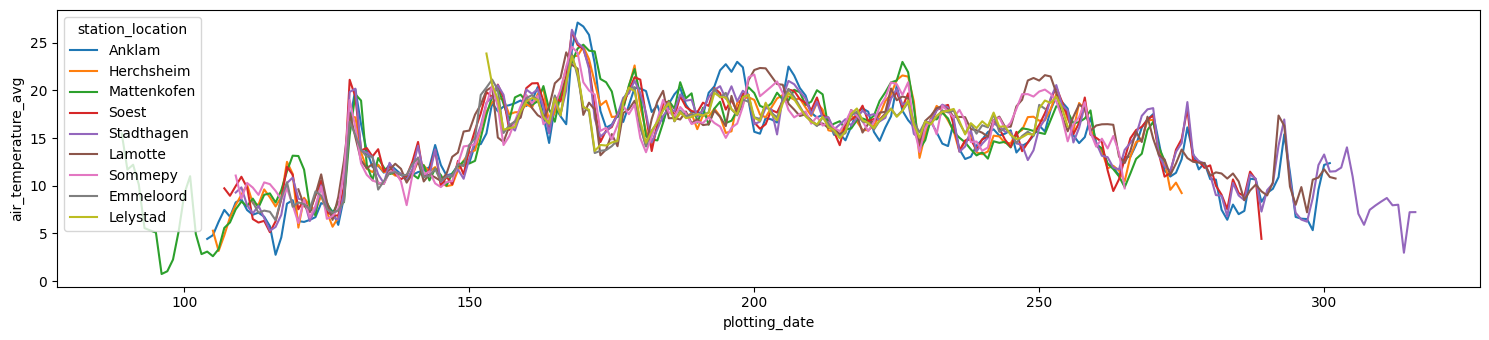

In [76]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'air_temperature_avg', hue = 'station_location')
plt.savefig('figures/Lufttemperatur.png') # , dpi= 300) # for high resolution

#### Taupunkt

<AxesSubplot:xlabel='plotting_date', ylabel='dew_point_avg'>

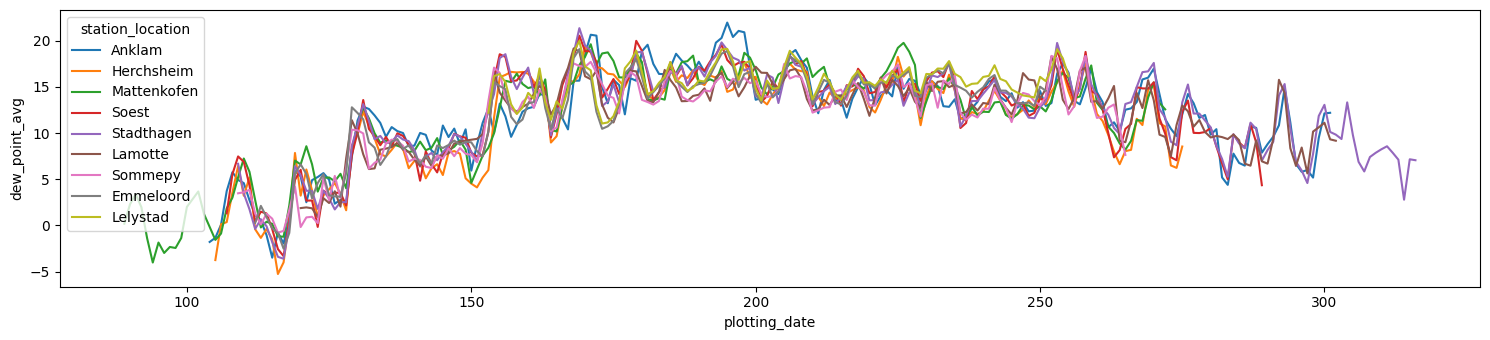

In [78]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'dew_point_avg', hue = 'station_location')

#### Solarstrahlung

<AxesSubplot:xlabel='plotting_date', ylabel='solar_radiation'>

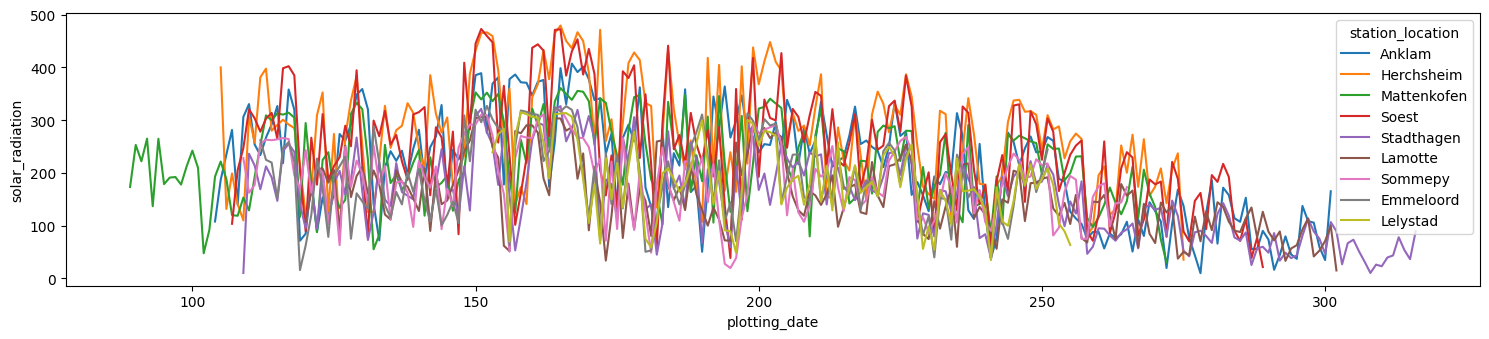

In [80]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'solar_radiation', hue = 'station_location')

#### Sättigungsdampfdruck

<AxesSubplot:xlabel='plotting_date', ylabel='saturation_vpd_avg'>

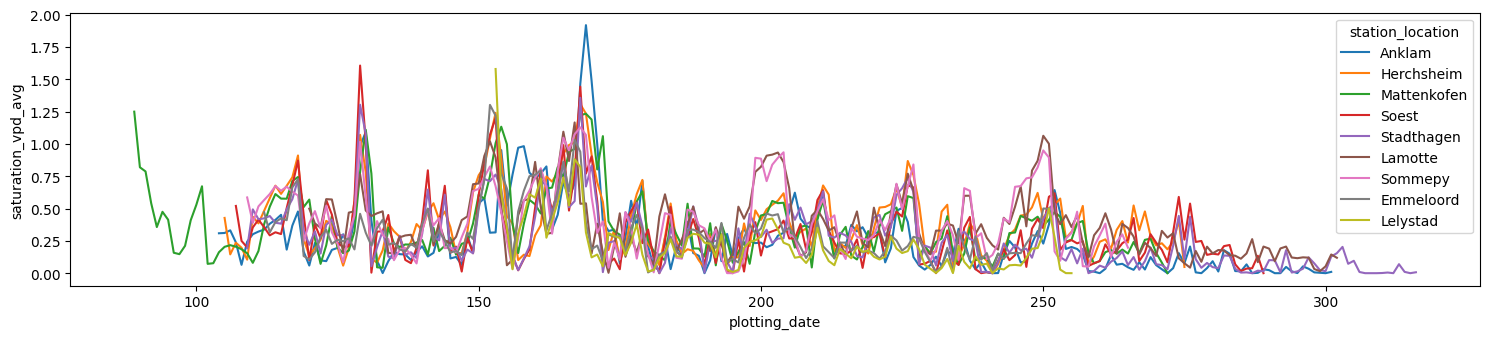

In [81]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'saturation_vpd_avg', hue = 'station_location')

#### relative Luftfeuchte

<AxesSubplot:xlabel='plotting_date', ylabel='relative_humidity_avg'>

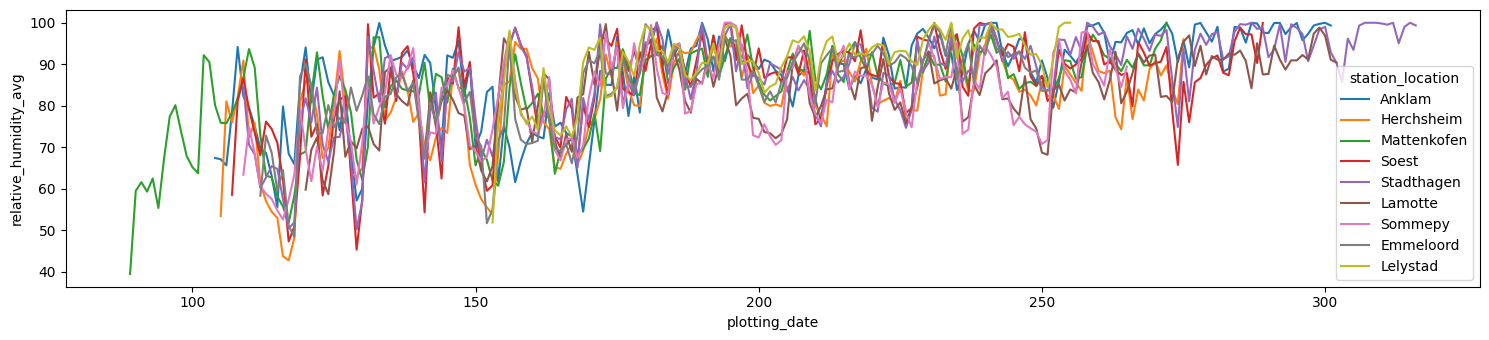

In [82]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'relative_humidity_avg', hue = 'station_location')

#### Niederschlag

<AxesSubplot:xlabel='plotting_date', ylabel='precipitation'>

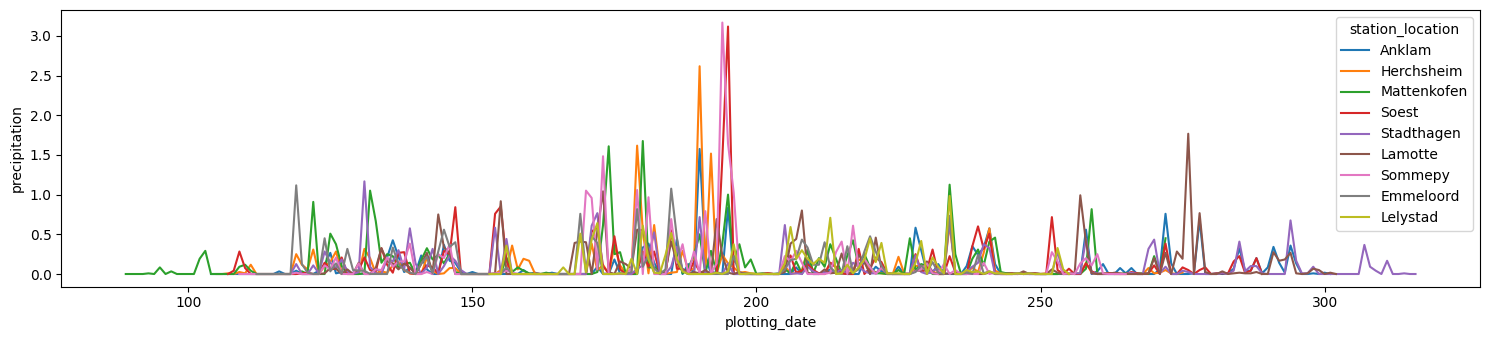

In [83]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'precipitation', hue = 'station_location')

#### Blattnässe

<AxesSubplot:xlabel='plotting_date', ylabel='leaf_wetness'>

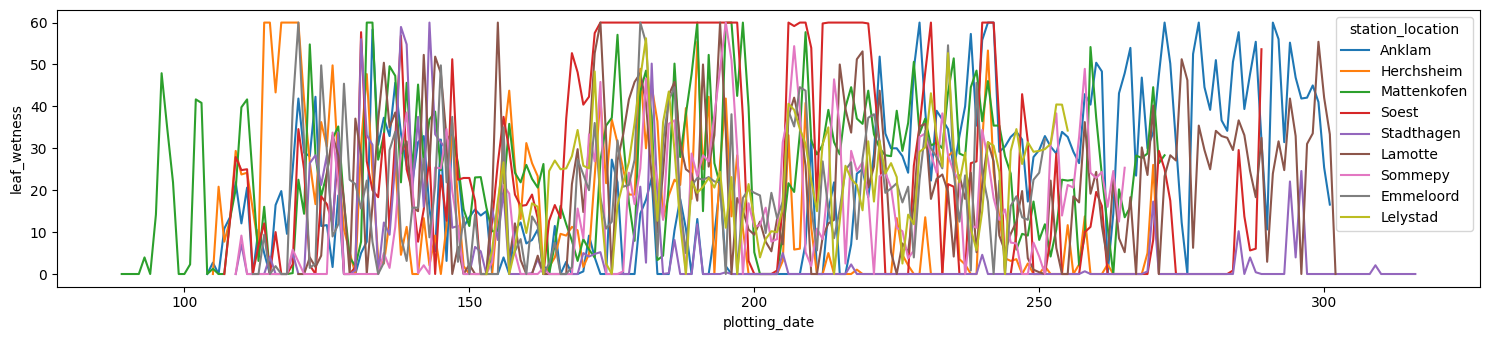

In [84]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'leaf_wetness', hue = 'station_location')

#### u-sonic wind speed

<AxesSubplot:xlabel='plotting_date', ylabel='wind_speed_avg'>

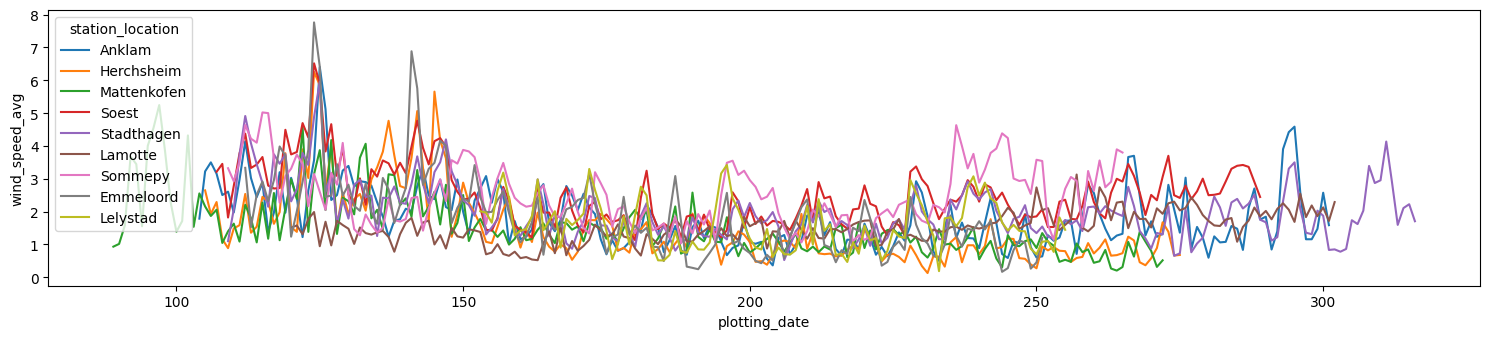

In [86]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'wind_speed_avg', hue = 'station_location')

#### Bodenfeuchte

<AxesSubplot:xlabel='plotting_date', ylabel='eag_soil_moisture_1'>

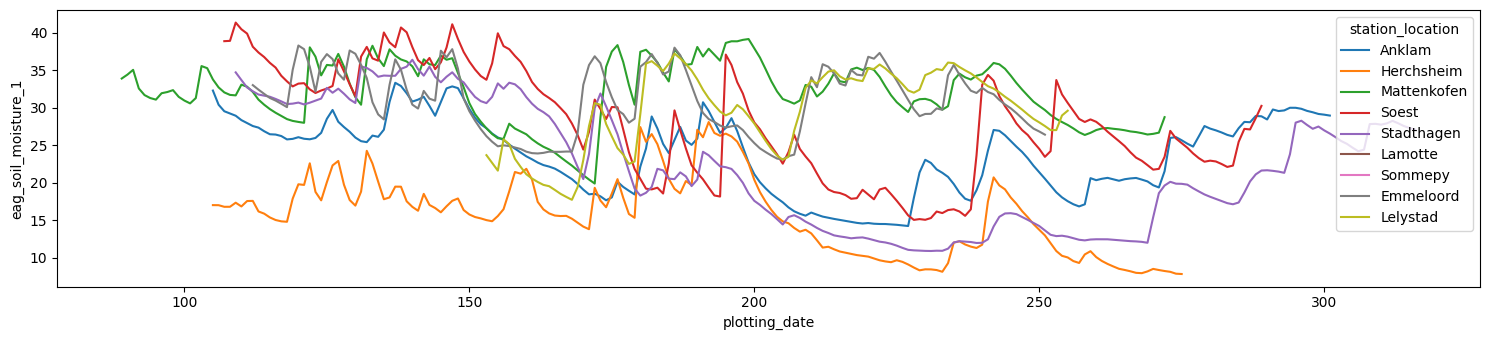

In [87]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'eag_soil_moisture_1', hue = 'station_location')


<AxesSubplot:xlabel='plotting_date', ylabel='eag_soil_moisture_2'>

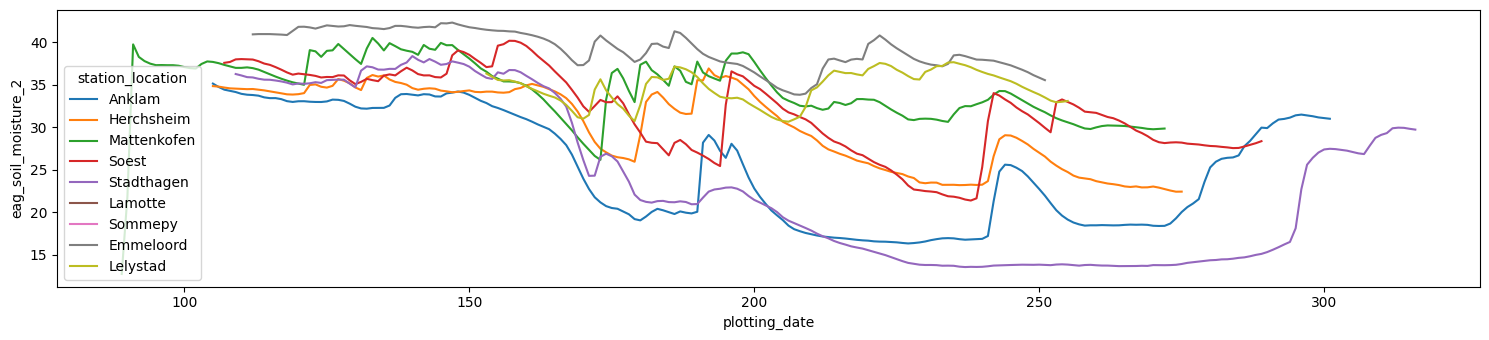

In [88]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'eag_soil_moisture_2', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='eag_soil_moisture_3'>

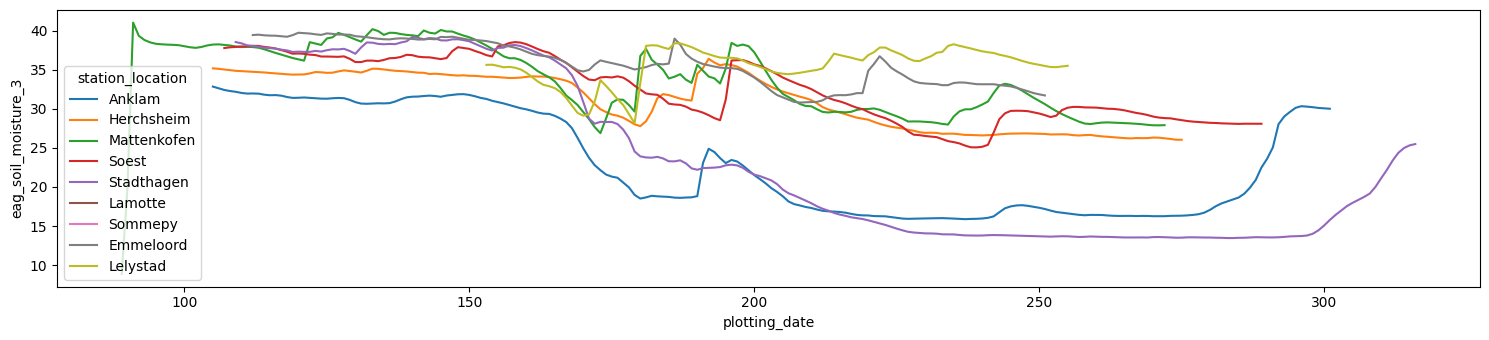

In [89]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'eag_soil_moisture_3', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='eag_soil_moisture_4'>

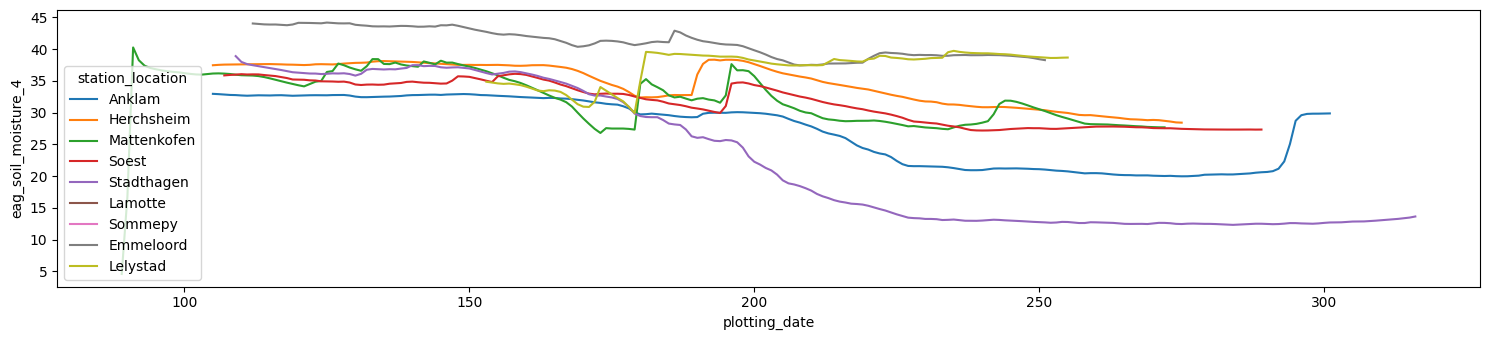

In [90]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'eag_soil_moisture_4', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='eag_soil_moisture_5'>

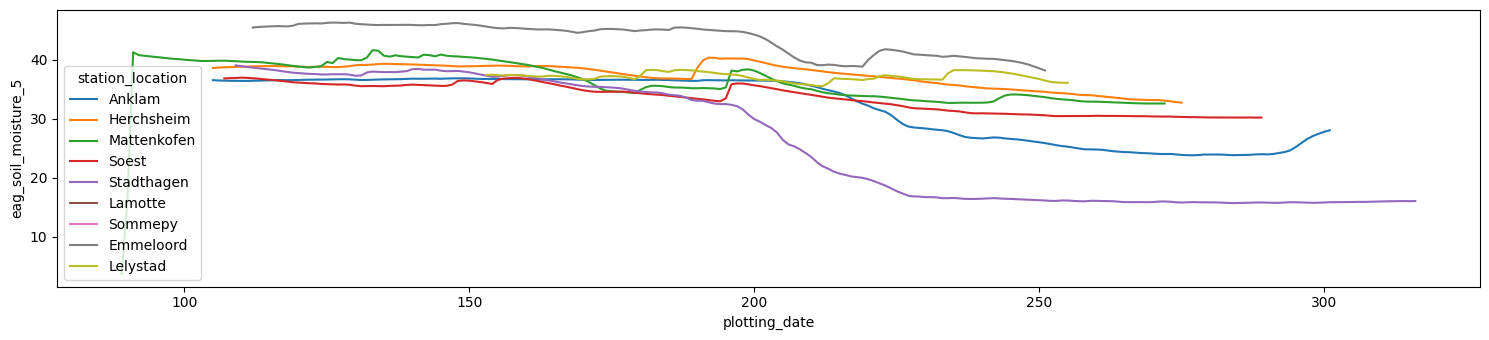

In [91]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'eag_soil_moisture_5', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='eag_soil_moisture_6'>

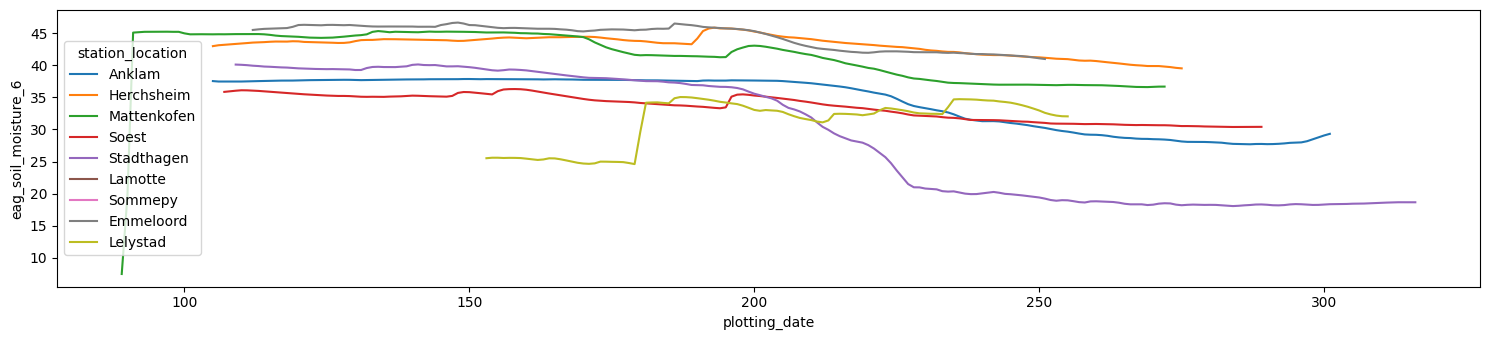

In [92]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'eag_soil_moisture_6', hue = 'station_location')

#### Bodensalzgehalt

<AxesSubplot:xlabel='plotting_date', ylabel='soil_salinity_1'>

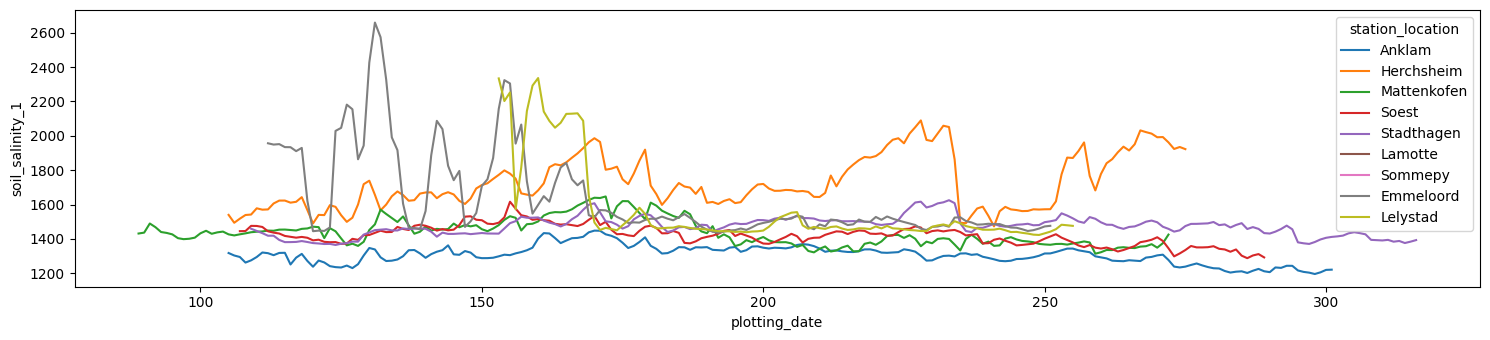

In [93]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_salinity_1', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_salinity_2'>

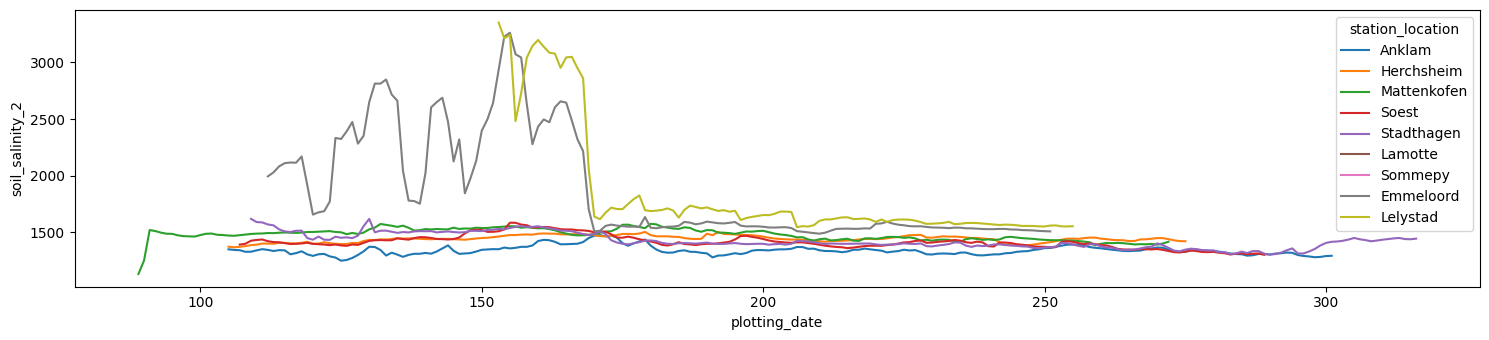

In [94]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_salinity_2', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_salinity_3'>

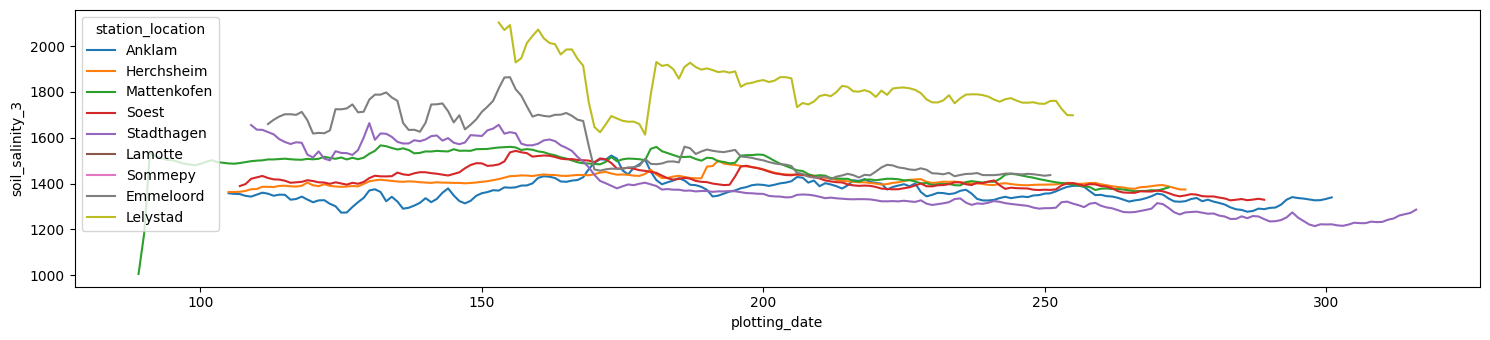

In [95]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_salinity_3', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_salinity_4'>

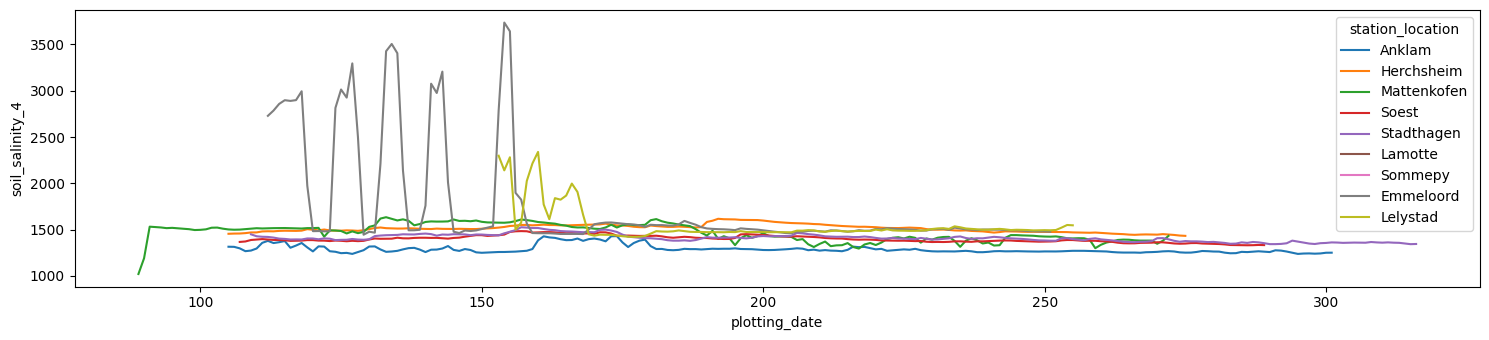

In [96]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_salinity_4', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_salinity_5'>

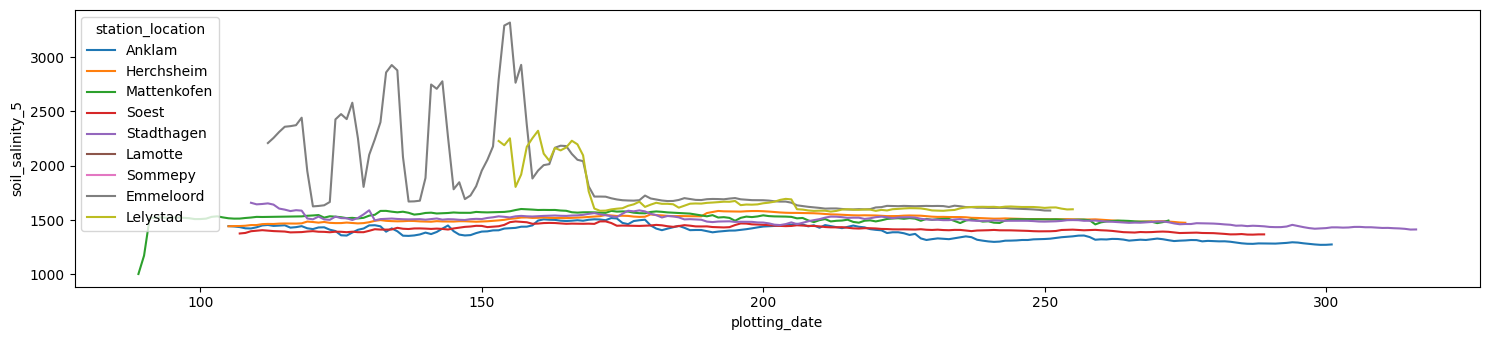

In [97]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_salinity_5', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_salinity_6'>

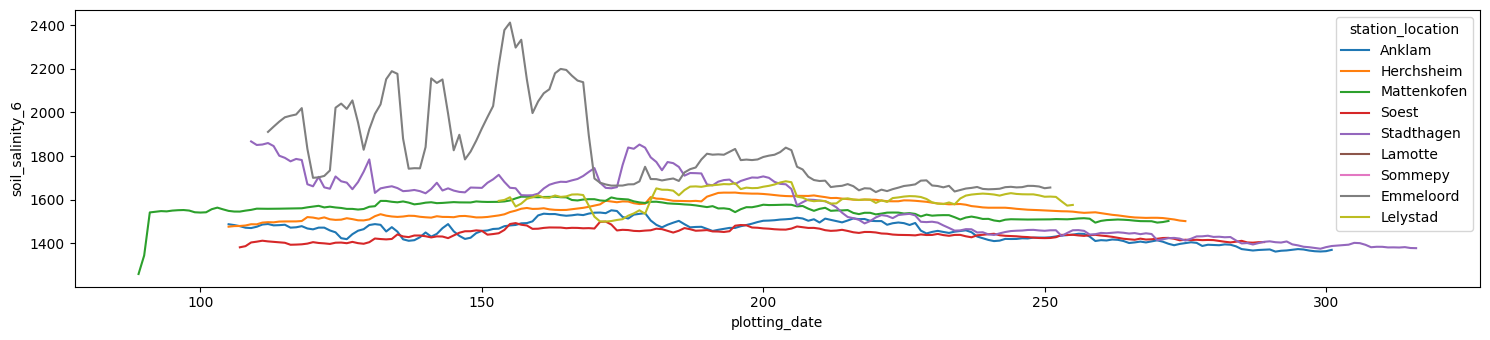

In [98]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_salinity_6', hue = 'station_location')

#### Bodentemperatur

<AxesSubplot:xlabel='plotting_date', ylabel='soil_temperature_1_vg'>

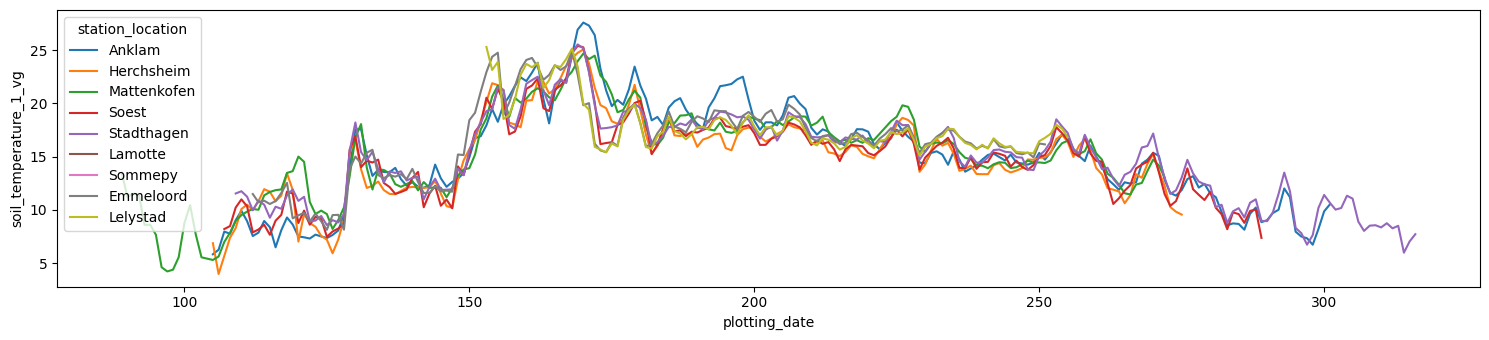

In [101]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_temperature_1_vg', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_temperature_2_vg'>

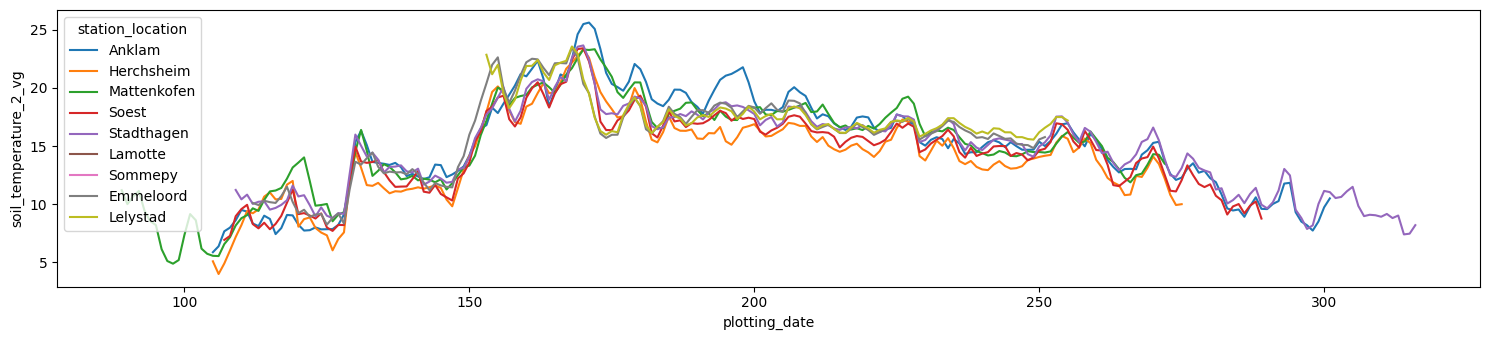

In [102]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_temperature_2_vg', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_temperature_3_vg'>

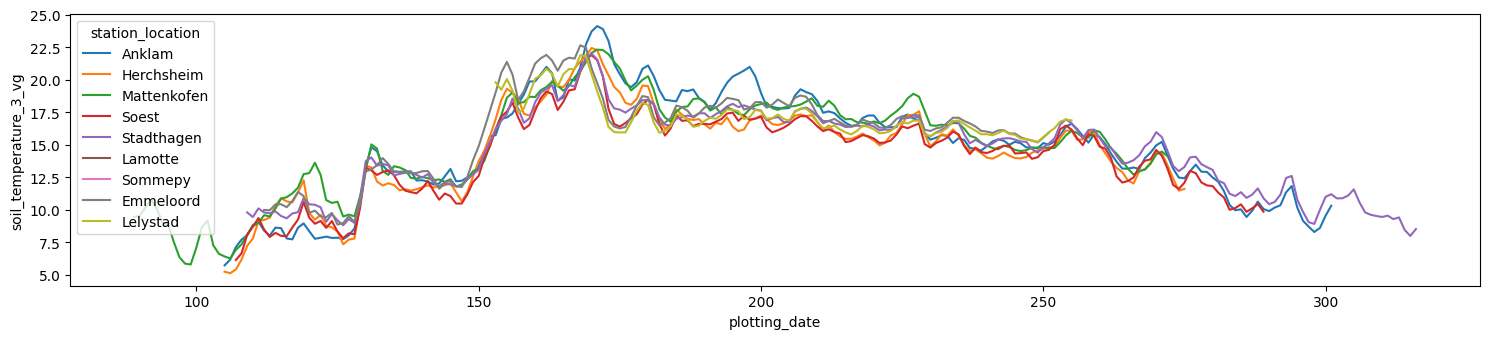

In [103]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_temperature_3_vg', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_temperature_4_vg'>

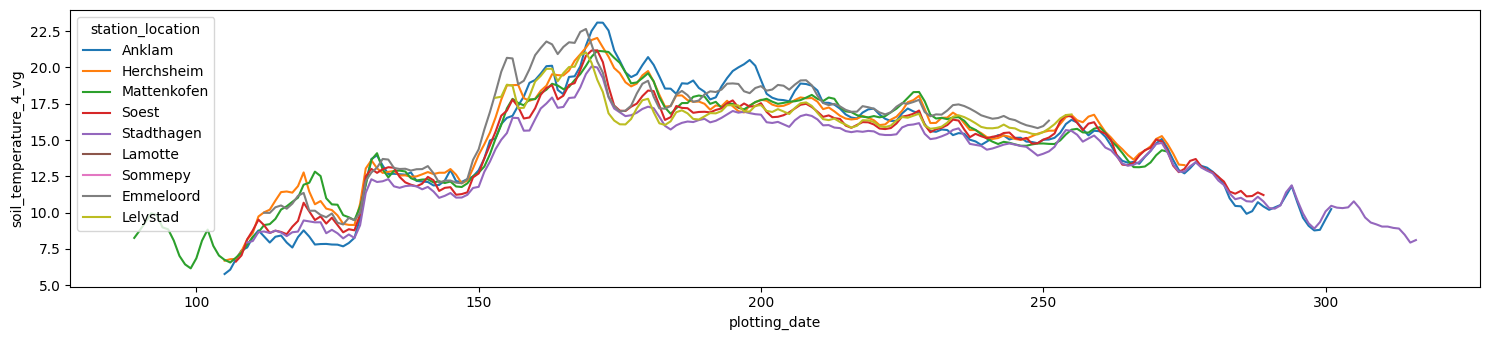

In [104]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_temperature_4_vg', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_temperature_5_vg'>

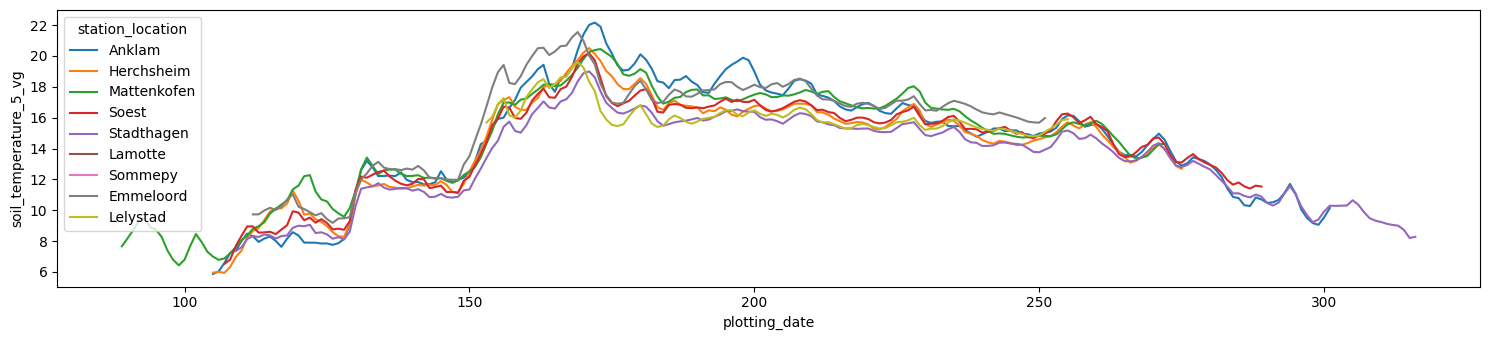

In [105]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_temperature_5_vg', hue = 'station_location')

<AxesSubplot:xlabel='plotting_date', ylabel='soil_temperature_6_vg'>

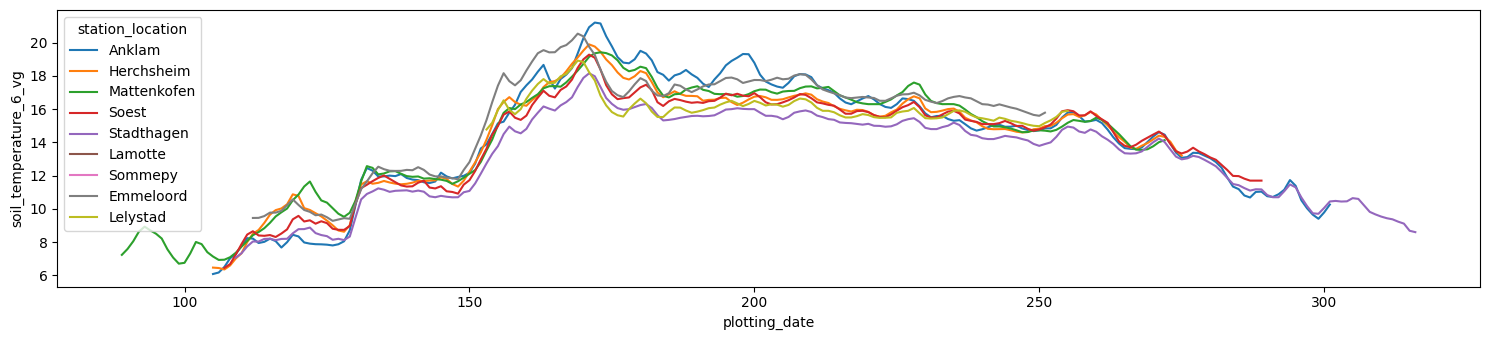

In [106]:
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_temperature_6_vg', hue = 'station_location')